# Libraries

In [1]:
library(dplyr)
library(lubridate)
library(ggplot2)
library(stringr)

w = 12
h = 5
options(repr.plot.width = w, repr.plot.height = h) # Plot size


Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



Attaching package: 'lubridate'


The following object is masked from 'package:base':

    date




# Data preparation

In [2]:
df <- 
    data.table::fread('vlast_prices.csv', encoding = 'UTF-8') %>% 
    setNames(c('shop', 'product', 'translation', 'date', 'price')) %>% 
    filter(shop != 'Сары-Арка') %>% # Didn't use it as it has duplicated products and not precise prices
    mutate(
        date = ymd(`date`),
        period = reorder(ifelse(`date` == '2014-02-12', 'before', 'after'), date)
    ) %>% 
    select(-date, -shop, -product) %>% 
    rename(product = translation)

df %>% head()

,product,price,period
,<chr>,<int>,<fct>
1,potatoes,65,before
2,potatoes,159,after
3,carrot,82,before
4,carrot,119,after
5,cabbage,64,before
6,cabbage,79,after


In [3]:
df_difference <- 
    df %>% 
    tidyr::spread(period, price) %>% 
    mutate(
        difference = round(after / before, 1),
        product = str_replace(product, ' ', '\n'),
        product = reorder(product, -difference)
    )

df_difference %>% head()

,product,before,after,difference
,<fct>,<int>,<int>,<dbl>
1,butter,265,629,2.4
2,cabbage,64,79,1.2
3,carrot,82,119,1.5
4,ground beef,999,2430,2.4
5,oatmeal,99,400,4.0
6,onion,69,79,1.1


# Data visualization

Cudos to Dr. Cédric Scherer for this great [presentation](https://www.cedricscherer.com/slides/OutlierConf2021_ggplot-wizardry.pdf)!

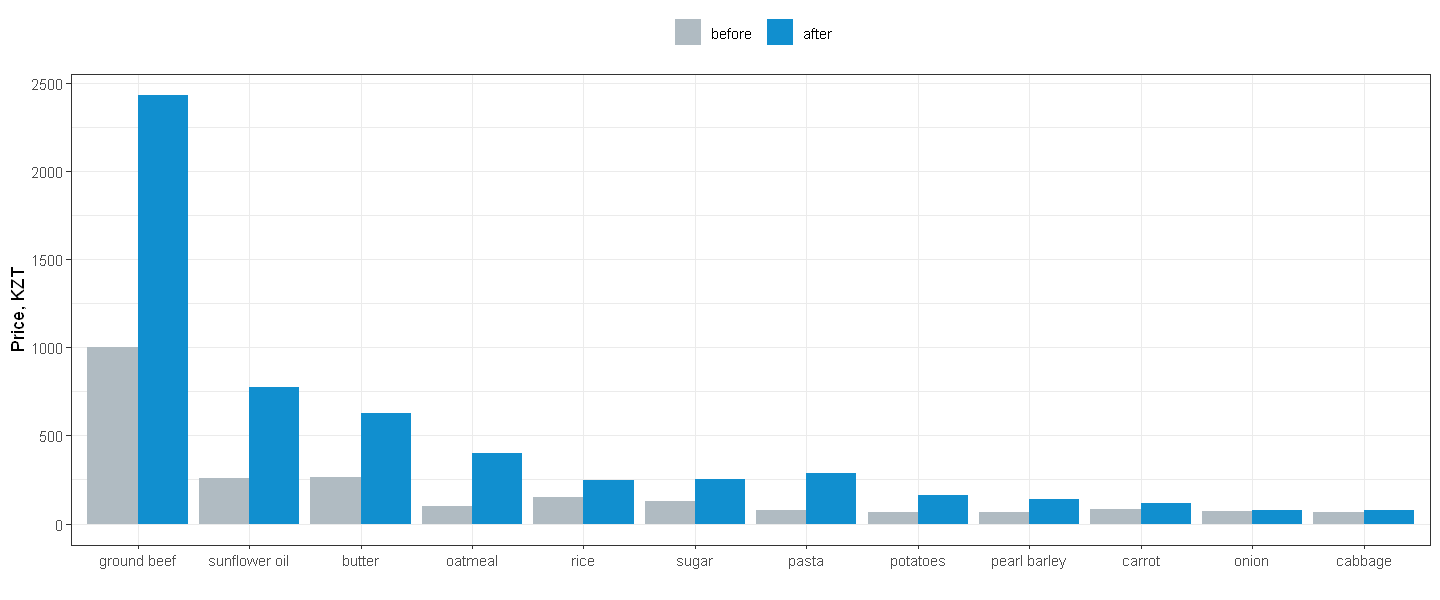

In [4]:
df %>% 
    mutate(
        period = ordered(period, levels = c('before', 'after')),
        product = reorder(product, -price)
    ) %>% 
    ggplot(aes(x = product, y = price, fill = period)) +
    geom_bar(stat = 'identity', position = 'dodge') +
    labs(
        x = '',
        y = 'Price, KZT',
        fill = ''
    ) +
    scale_fill_manual(values = c('#b0bbc2', '#118fcf')) +
    theme_bw() +
    theme(
        legend.position = 'top'
    )

In [5]:
ggsave('grouped_bar.png',  width = w, height = h)

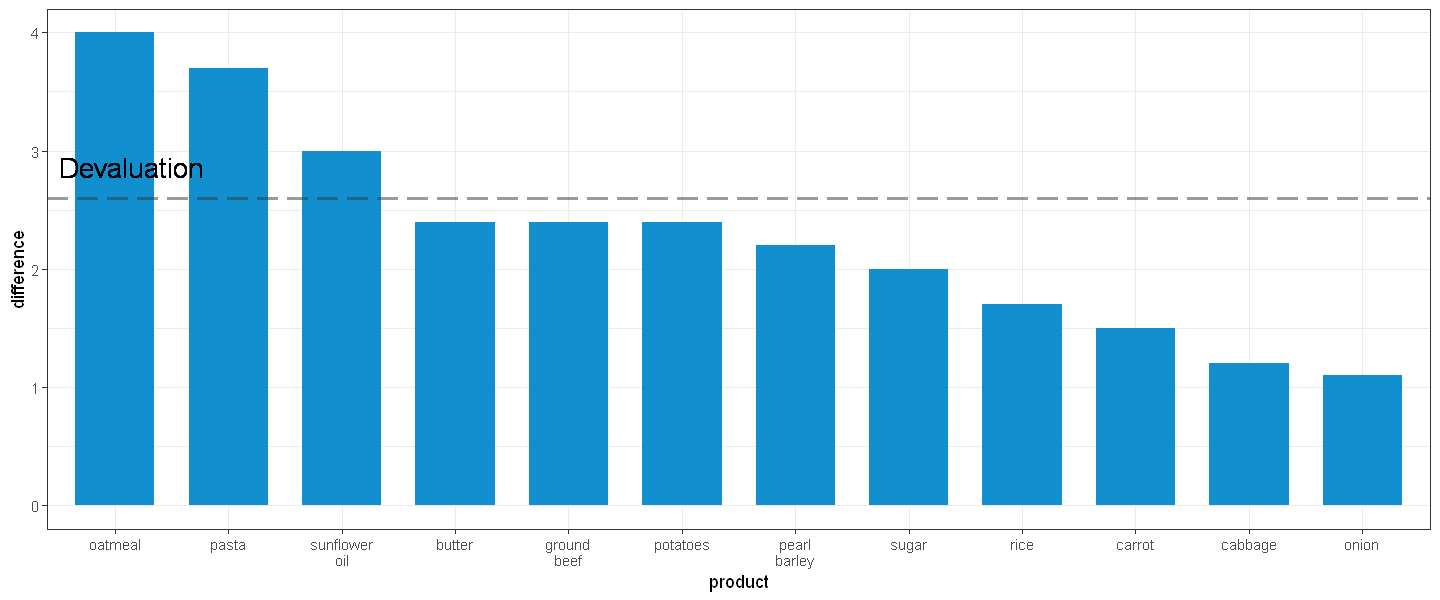

In [6]:
df_difference %>% 
    ggplot(aes(x = product, y = difference)) +
    geom_bar(stat = 'identity', width = .7, fill = '#118fcf') +
    geom_hline(aes(yintercept = 2.6), alpha = .5, size = 1, linetype = 5, col = '#2c3b3c') +
    geom_text(aes(x = 1.15, y = 2.6, label = 'Devaluation'), vjust = -1, size = 6) +
    theme_bw()

In [7]:
ggsave('difference_bar.png',  width = w, height = h)

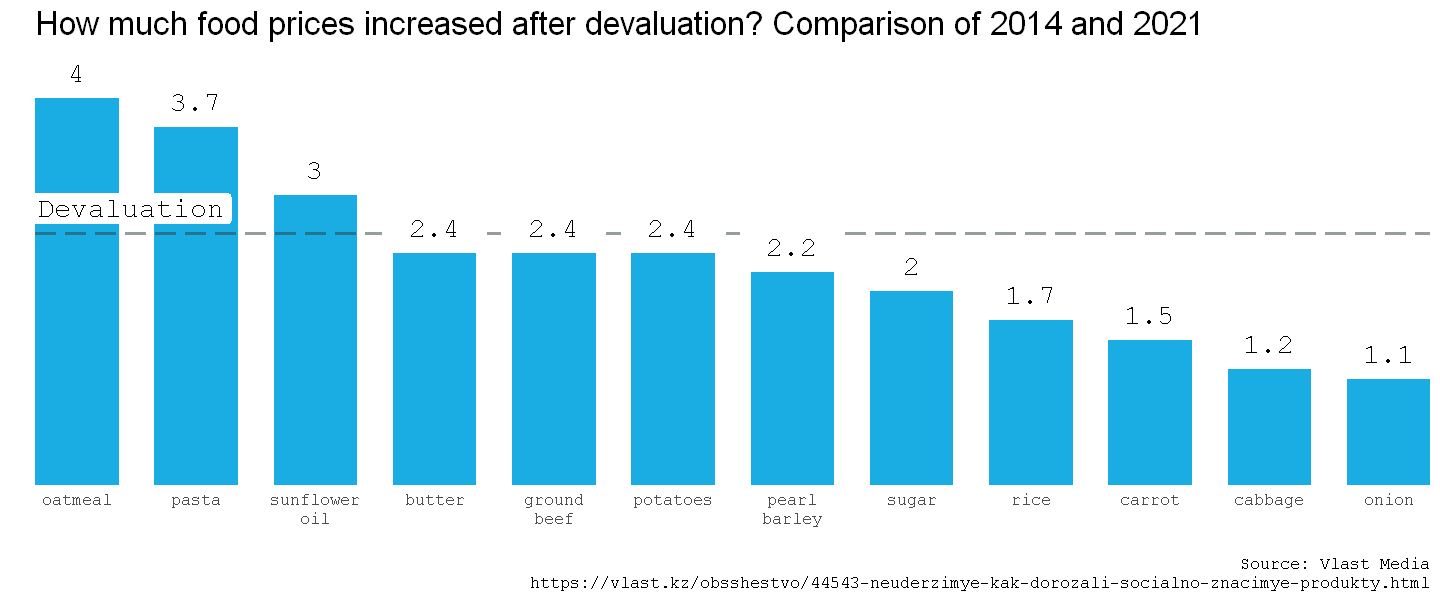

In [8]:
df_difference %>% 
    ggplot(aes(x = product, y = difference)) +
    geom_bar(stat = 'identity', width = .7, fill = '#19ade3') + # Bar chart

    geom_hline(aes(yintercept = 2.6), alpha = .5, size = 1, linetype = 5, col = '#2c3b3c') + # Reference line, devaluation rate

    geom_label(aes(x = 1.45, y = 2.6, label = 'Devaluatio'), vjust = -.3, size = 6.5, colour = NA, family = 'mono') + # Background for geom_text() to overlap bars
    geom_text(aes(x = 1.45, y = 2.6, label = 'Devaluation'), vjust = -1, size = 6, family = 'mono') + # Legend for a reference line

    geom_label(aes(x = product, y = difference, label = difference), vjust = 0, size = 11, colour = NA, family = 'mono') + # Background for geom_text() to overlap reference line
    geom_text(aes(label = difference), vjust = -1, size = 6, family = 'mono') + # Text labels

    scale_y_continuous(limits = c(0, 4.5)) + # Extended Y axis

    labs(
        title = 'How much food prices increased after devaluation? Comparison of 2014 and 2021',
        x = '',
        y = '',
        caption = 'Source: Vlast.kz Media\nhttps://vlast.kz/obsshestvo/44543-neuderzimye-kak-dorozali-socialno-znacimye-produkty.html'
    ) + # Title, axis labels, caption

    coord_cartesian(expand = F) + # Remove white space before the first bar for better alignment
    theme( # Custom theme
        plot.title.position = 'panel',
        axis.ticks = element_blank(),
        axis.text.y = element_blank(),
        panel.background = element_blank(),
        panel.grid = element_blank(),
        plot.title = element_text(size = 20, family = 'sans'),
        text = element_text(size = 13, family = 'mono'),     
    )

In [9]:
ggsave('difference_bar_updated.png',  width = w, height = h)